##### 20 July 2020 | Başak ER

<img src="picture.png" alt="steps" style="width: 600px;"/>

### Paketlerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple

### Veri


In [2]:
df = pd.read_csv('veri.csv',parse_dates=['Date'])
df.rename(columns={'Date':'Date', 'Country_Region':'Country'}, inplace=True)

## Veri İçeriği

In [3]:
df.head()

Country       Date  ConfirmedCases  Daily Cases  Fatalities  new_deaths  \
0  Turkey 2020-03-12               1            1           0           0   
1  Turkey 2020-03-13               2            1           0           0   
2  Turkey 2020-03-16              18           16           0           0   
3  Turkey 2020-03-17              47           29           0           0   
4  Turkey 2020-03-18              98           51           0           0   

   total_tests  new_tests  new_tests_smoothed  
0          NaN        NaN                 NaN  
1          NaN        NaN                 NaN  
2          NaN        NaN                 NaN  
3          NaN        NaN                 NaN  
4      10018.0        NaN                 NaN

In [4]:
df.describe()

ConfirmedCases  Daily Cases    Fatalities   new_deaths   total_tests  \
count      598.000000   598.000000    598.000000   598.000000  3.280000e+02   
mean    135047.200669  1748.245819  12243.740803   151.063545  1.867391e+06   
std      69132.066634  1479.099410  11529.904568   218.586312  1.587796e+06   
min          1.000000  -766.000000      0.000000   -31.000000  1.001800e+04   
25%      86313.000000   576.250000   3739.000000    27.000000  5.756488e+05   
50%     149253.000000  1300.500000   7630.500000    74.000000  1.400672e+06   
75%     185609.500000  2536.750000  24107.250000   153.000000  2.832645e+06   
max     248379.000000  7578.000000  34914.000000  2004.000000  6.376054e+06   

           new_tests  new_tests_smoothed  
count     478.000000          463.000000  
mean    38797.142259        38671.954644  
std     18006.984074        16539.649105  
min      1738.000000         3284.000000  
25%     25458.500000        26647.500000  
50%     37322.500000        39109.000000  
75%     52534.250000        52343.000000  
max    101312.000000        70592.000000

In [5]:
df.groupby('Date').sum()

ConfirmedCases  Daily Cases  Fatalities  new_deaths  total_tests  \
Date                                                                           
2020-03-12           25311         4040        1232         275      86011.0   
2020-03-13           30435         5124        1511         279      97488.0   
2020-03-14           35747         5314        1866         355     109170.0   
2020-03-15           42180         6433        2151         285     377072.0   
2020-03-16           48197         6015        2674         523     137962.0   
...                    ...          ...         ...         ...          ...   
2020-07-05         1047202         4077       90373         191   13809069.0   
2020-07-06         1051321         4119       90566         193   11163130.0   
2020-07-07         1056993         5672       90785         219   11283684.0   
2020-07-08         1061692         4699       91059         274   11409027.0   
2020-07-09         1066722         5030       91293         234    7704471.0   

            new_tests  new_tests_smoothed  
Date                                       
2020-03-12    12857.0              7664.0  
2020-03-13    11477.0              8733.0  
2020-03-14    11682.0              9587.0  
2020-03-15    33937.0             28917.0  
2020-03-16    35785.0             34741.0  
...               ...                 ...  
2020-07-05   183722.0            193556.0  
2020-07-06    97658.0            121579.0  
2020-07-07   120554.0            120824.0  
2020-07-08   125343.0            119478.0  
2020-07-09    77964.0             69522.0  

[120 rows x 7 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Country             598 non-null    object        
 1   Date                598 non-null    datetime64[ns]
 2   ConfirmedCases      598 non-null    int64         
 3   Daily Cases         598 non-null    int64         
 4   Fatalities          598 non-null    int64         
 5   new_deaths          598 non-null    int64         
 6   total_tests         328 non-null    float64       
 7   new_tests           478 non-null    float64       
 8   new_tests_smoothed  463 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 42.2+ KB


In [7]:
df.isnull().sum()

Country                 0
Date                    0
ConfirmedCases          0
Daily Cases             0
Fatalities              0
new_deaths              0
total_tests           270
new_tests             120
new_tests_smoothed    135
dtype: int64

#### Veri Setindeki Tarih Bilgisi

In [8]:
start_date = df.Date.min()
end_date = df.Date.max()
print('Dataset information:\n 1. Start date = {}\n 2. End date = {}'.format(start_date, end_date))

Dataset information:
 1. Start date = 2020-03-12 00:00:00
 2. End date = 2020-07-09 00:00:00


### Vaka 

In [9]:
print(df['ConfirmedCases'].describe())


count       598.000000
mean     135047.200669
std       69132.066634
min           1.000000
25%       86313.000000
50%      149253.000000
75%      185609.500000
max      248379.000000
Name: ConfirmedCases, dtype: float64


### Ölüm

In [10]:
print(df['Fatalities'].describe())

count      598.000000
mean     12243.740803
std      11529.904568
min          0.000000
25%       3739.000000
50%       7630.500000
75%      24107.250000
max      34914.000000
Name: Fatalities, dtype: float64


### Günlük Test

In [11]:
print(df['new_tests'].describe())

count       478.000000
mean      38797.142259
std       18006.984074
min        1738.000000
25%       25458.500000
50%       37322.500000
75%       52534.250000
max      101312.000000
Name: new_tests, dtype: float64


### Sütunlar

In [12]:
df.columns

Index(['Country', 'Date', 'ConfirmedCases', 'Daily Cases', 'Fatalities',
       'new_deaths', 'total_tests', 'new_tests', 'new_tests_smoothed'],
      dtype='object')

In [13]:
mask = df['Date'].max()
cum_confirmed = sum(df[df['Date'] == mask].ConfirmedCases)
cum_fatal = sum(df[df['Date'] == mask].Fatalities)

###################################################################

print('Number of Countries are: ', len(df['Country'].unique()))
print('Training dataset ends at: ', mask)
print('Number of cumulative confirmed cases are: ', cum_confirmed)
print('Number of cumulative fatal cases are: ', cum_fatal)

Number of Countries are:  5
Training dataset ends at:  2020-07-09 00:00:00
Number of cumulative confirmed cases are:  1066722
Number of cumulative fatal cases are:  91293


### Vaka Sayısına göre Ülkeler Arası Sıralama

In [14]:
total = df.groupby('Country').sum()
total = total.sort_values(by=['ConfirmedCases'], ascending=False)
total.style.background_gradient(cmap='OrRd')

### 9 Temmuz Tarihindeki Vaka Sayısına göre Ülkeler Arası Sıralama

In [15]:
cum_per_country = df[df['Date'] == mask].groupby(['Date','Country']).sum().sort_values(['ConfirmedCases'], ascending=False)
cum_per_country[:5]

ConfirmedCases  Daily Cases  Fatalities  new_deaths  \
Date       Country                                                        
2020-07-09 Iran             248379         2691       12084         153   
           Italy            242149          193       34914          15   
           Turkey           208938         1041        5282          22   
           Germany          197783          442        9048          12   
           France           169473          663       29965          32   

                    total_tests  new_tests  new_tests_smoothed  
Date       Country                                              
2020-07-09 Iran       1897803.0    25412.0             25529.0  
           Italy      5806668.0    52552.0             43993.0  
           Turkey           0.0        0.0                 0.0  
           Germany          0.0        0.0                 0.0  
           France           0.0        0.0                 0.0

In [16]:
confirmed = df.groupby('Date').sum()['ConfirmedCases'].reset_index()
deaths = df.groupby('Date').sum()['Fatalities'].reset_index()
tests = df.groupby('Date').sum()['new_tests'].reset_index()

In [17]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['ConfirmedCases'],
                name='Vaka',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Fatalities'],
                name='Ölüm',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=tests['Date'],
                y=tests['new_tests'],
                name='Test',
                marker_color='Green'
                ))

fig.update_layout(
    title='5 Ülkenin Corona Virüs Vaka, Ölüm, Test Sayıları (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Vaka Sayısı',
        titlefont_size=15,
        tickfont_size=15,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.1, # gap between bars of adjacent location coordinates.
    bargroupgap=0.05 # gap between bars of the same location coordinate.
)
fig.show()

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], 
                         y=confirmed['ConfirmedCases'],
                         mode='lines+markers',
                         name='Vaka',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=deaths['Date'], 
                         y=deaths['Fatalities'],
                         mode='lines+markers',
                         name='Ölüm',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=tests['Date'], 
                         y=tests['new_tests'],
                         mode='lines+markers',
                         name='Test',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='5 Ülkenin Corona Virüs Vaka, Ölüm, Test Sayıları (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Vaka Sayıları',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

In [19]:
#TODO: optimize code
date = df['Date']
cc_ir = df[df['Country'] == 'Iran'].groupby(['Date']).sum().ConfirmedCases
ft_ir = df[df['Country'] == 'Iran'].groupby(['Date']).sum().Fatalities
cc_tr = df[df['Country'] == 'Turkey'].groupby(['Date']).sum().ConfirmedCases
ft_tr = df[df['Country'] == 'Turkey'].groupby(['Date']).sum().Fatalities
cc_ity = df[df['Country'] == 'Italy'].groupby(['Date']).sum().ConfirmedCases
ft_ity = df[df['Country'] == 'Italy'].groupby(['Date']).sum().Fatalities
cc_gmn = df[df['Country'] == 'Germany'].groupby(['Date']).sum().ConfirmedCases
ft_gmn = df[df['Country'] == 'Germany'].groupby(['Date']).sum().Fatalities
cc_frc = df[df['Country'] == 'France'].groupby(['Date']).sum().ConfirmedCases
ft_frc = df[df['Country'] == 'France'].groupby(['Date']).sum().Fatalities

fig = go.Figure()
# add trace
fig.add_trace(go.Scatter(x=date, y=cc_ir, name='Iran'))
fig.add_trace(go.Scatter(x=date, y=cc_tr, name='Turkey'))
fig.add_trace(go.Scatter(x=date, y=cc_ity, name='Italy'))
fig.add_trace(go.Scatter(x=date, y=cc_gmn, name='Germany'))
fig.add_trace(go.Scatter(x=date, y=cc_frc, name='France'))
fig.update_layout(title="5 Ülke için Kümülatif Vaka Dağılımı",
    xaxis_title="Tarih",
    yaxis_title="Vaka")
fig.update_xaxes(nticks=50)

fig.show()

In [20]:
fig = go.Figure()
# add traces
fig.add_trace(go.Scatter(x=date, y=ft_ir, name='Iran'))
fig.add_trace(go.Scatter(x=date, y=ft_tr, name='Turkey'))
fig.add_trace(go.Scatter(x=date, y=ft_ity, name='Italy'))
fig.add_trace(go.Scatter(x=date, y=ft_gmn, name='Germany'))
fig.add_trace(go.Scatter(x=date, y=ft_frc, name='France'))
fig.update_layout(title="5 Ülke için Kümülatif Ölüm Sayısı Dağılımı",
    xaxis_title="Tarih",
    yaxis_title="Ölüm")
fig.update_xaxes(nticks=30)

fig.show()

### BoxPlot

In [21]:
turkey=df[df['Country'] == 'Turkey']
iran=df[df['Country'] == 'Iran']
france=df[df['Country'] == 'France']
germany=df[df['Country'] == 'Germany']
italy=df[df['Country'] == 'Italy']

#### Tüm Veri

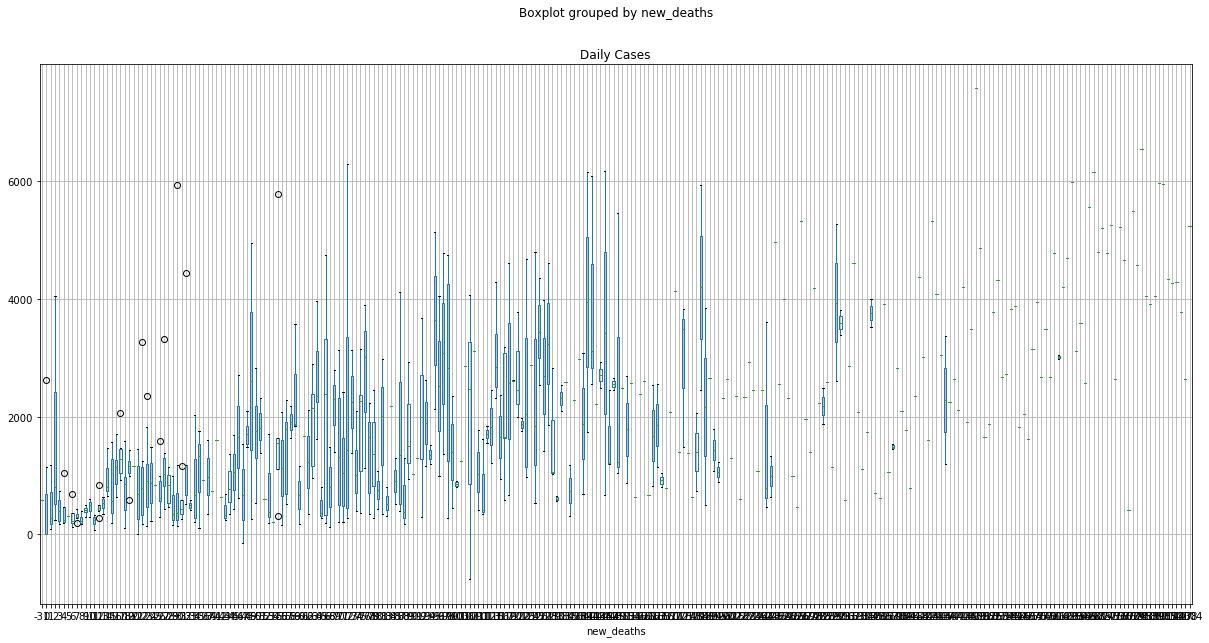

In [22]:
df.boxplot(column='Daily Cases',by = 'new_deaths',figsize = (20,10))

#### Türkiye 

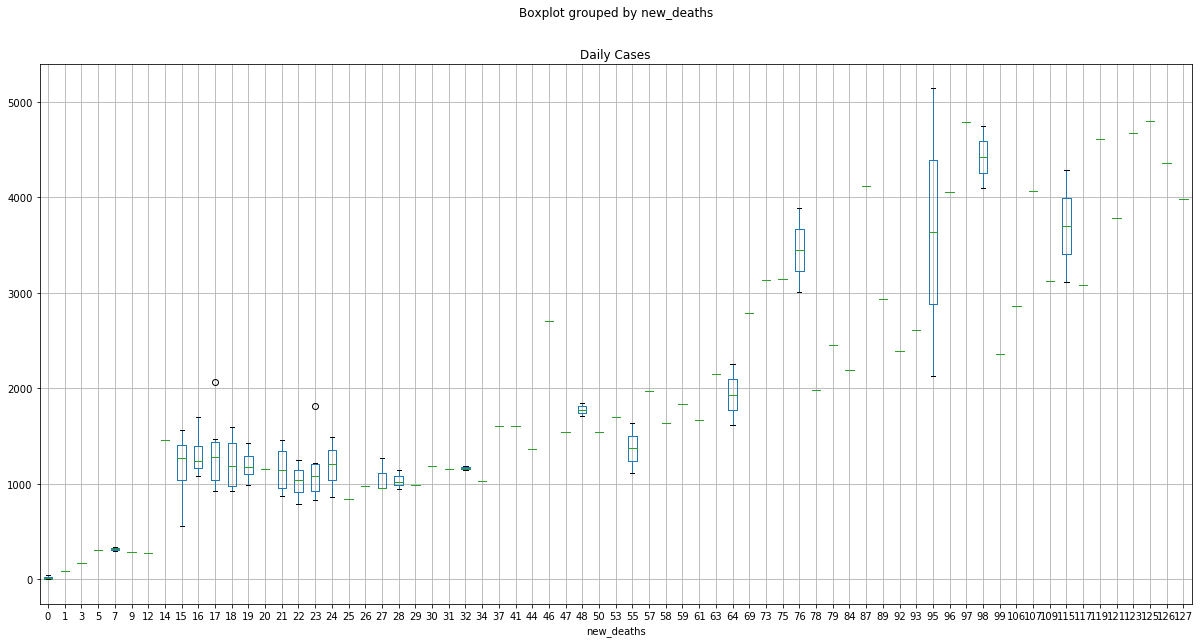

In [23]:
turkey.boxplot( column='Daily Cases',by = 'new_deaths',figsize = (20,10))

#### Iran

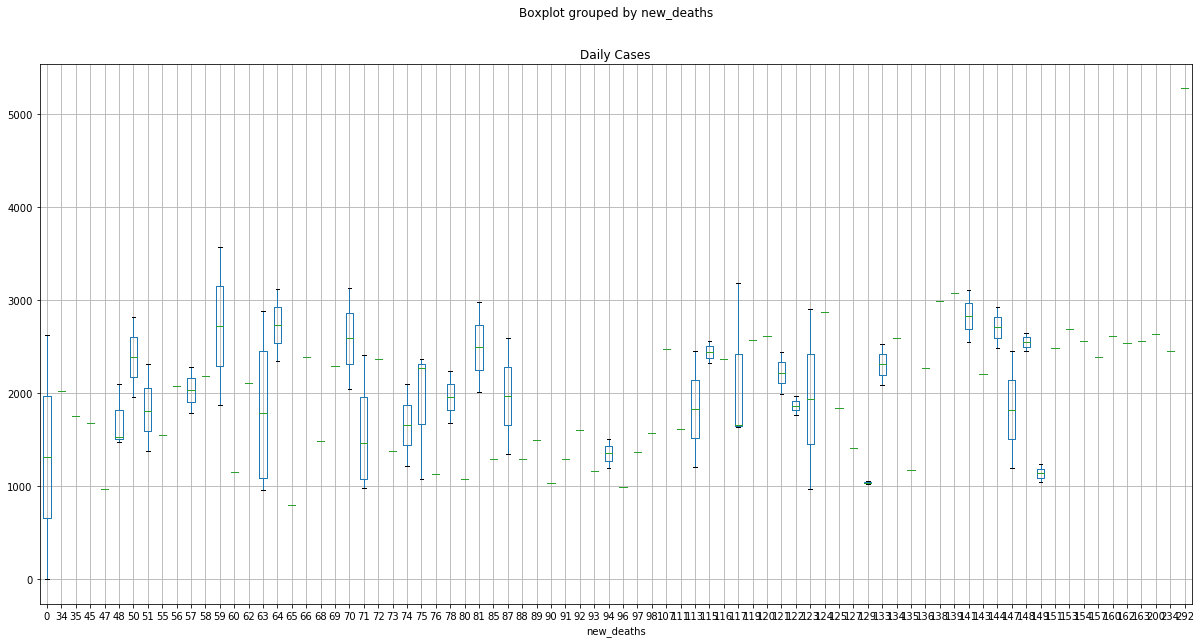

In [24]:
iran.boxplot( column='Daily Cases',by = 'new_deaths',figsize = (20,10))

#### Almanya

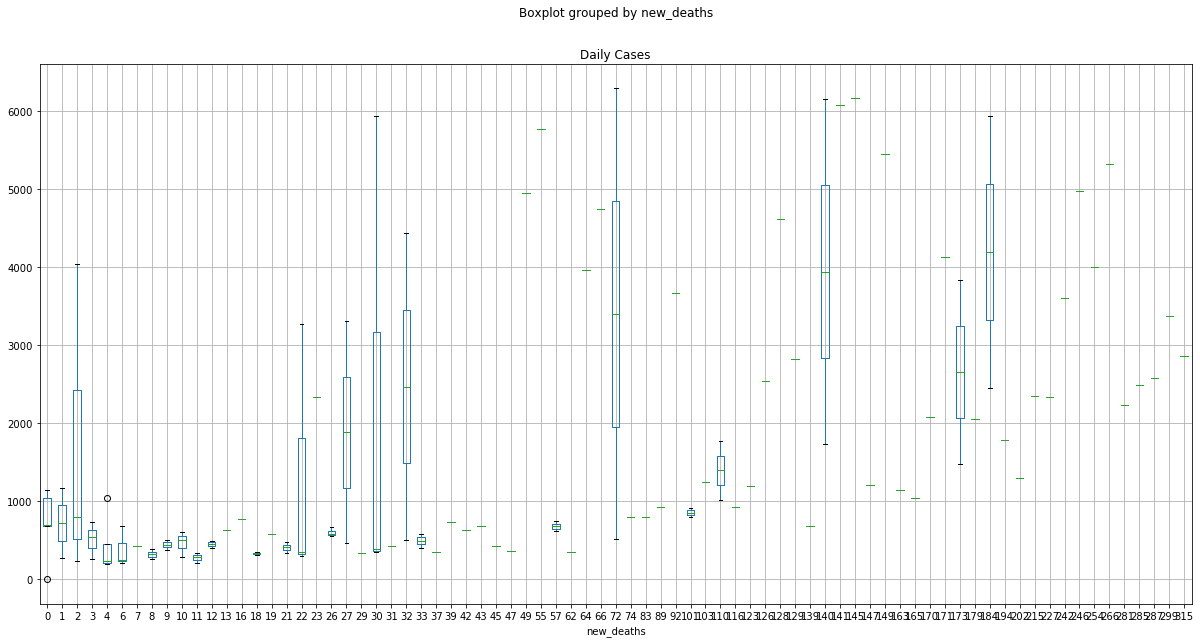

In [25]:
germany.boxplot( column='Daily Cases',by = 'new_deaths',figsize = (20,10))

#### Fransa 

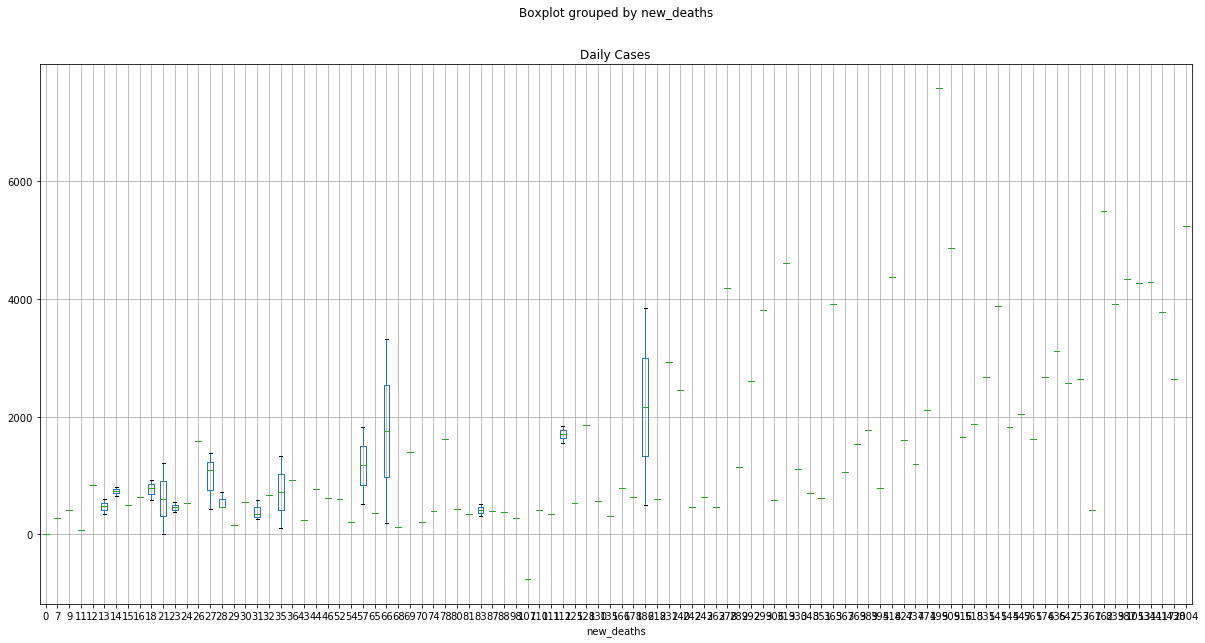

In [26]:
france.boxplot( column='Daily Cases',by = 'new_deaths',figsize = (20,10))

#### İtalya

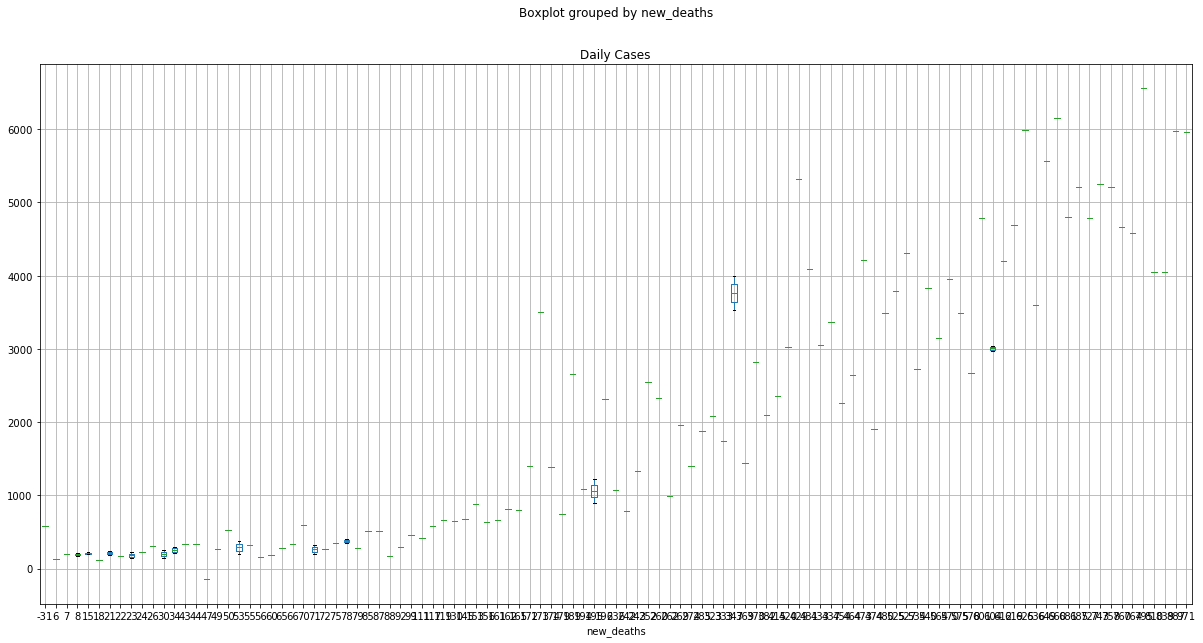

In [27]:
italy.boxplot( column='Daily Cases',by = 'new_deaths',figsize = (20,10))

### Ülke Bazında için Vaka-Ölüm Grafikleri

Text(0.5, 1.0, 'Turkey')

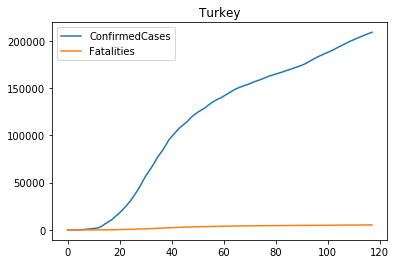

In [28]:
turkey1 = turkey.loc[:,["ConfirmedCases","Fatalities"]]
turkey1.plot().set_title("Turkey")


Text(0.5, 1.0, 'France')

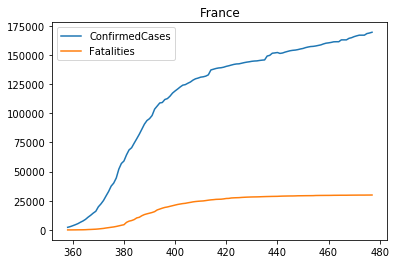

In [29]:
france1 = france.loc[:,["ConfirmedCases","Fatalities"]]
france1.plot().set_title("France")

Text(0.5, 1.0, 'Iran')

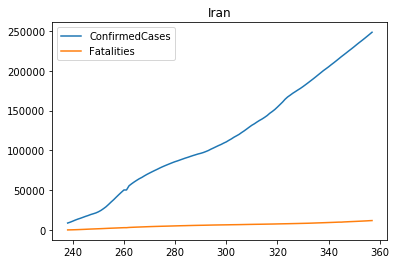

In [30]:
iran1 = iran.loc[:,["ConfirmedCases","Fatalities"]]
iran1.plot().set_title("Iran")

Text(0.5, 1.0, 'Germany')

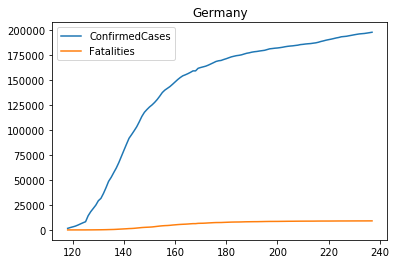

In [31]:
germany1 = germany.loc[:,["ConfirmedCases","Fatalities"]]
germany1.plot().set_title("Germany")

Text(0.5, 1.0, 'Italy')

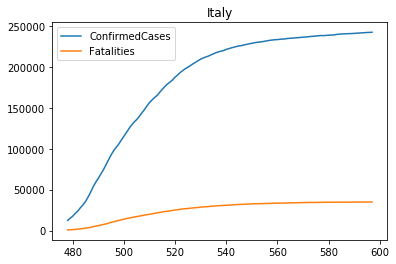

In [32]:
italy1 = italy.loc[:,["ConfirmedCases","Fatalities"]]
italy1.plot().set_title("Italy")

### Dünya Haritasında Ülkelerin Vaka Sayısındaki Son Durumu

In [33]:
Country=pd.DataFrame()
temp = df.loc[df["Date"]==df["Date"][len(df)-1]].groupby(['Country'])["ConfirmedCases"].sum().reset_index()
Country['Name']=temp["Country"]
Country['Values']=temp["ConfirmedCases"]

fig = px.choropleth(Country, locations='Name',
                    locationmode='country names',
                    color="Values")
fig.update_layout(title="Corona spread on 09-07-2020")
fig.show()

### Korelasyon Matrisleri

In [34]:
# Korelasyon katsayısı negatif ise iki değişken arasında ters ilişki vardır, yani "değişkenlerden biri artarken diğeri azalmaktadır" denir. 
# Korelasyon katsayısı pozitif ise "değişkenlerden biri artarken diğeride artmaktadır" yorumu yapılır.

# İki değişken arasında hesaplanan korelasyon (r) değeri:
# • r<0.20 ve sıfıra yakın değerler ilişkinin olmadığı ya da çok zayıf ilişkiyi işaret eder.
# • 0.20-0.39 arasında ise zayıf ilişki
# • 0.40-0.59 arasında ise orta düzeyde ilişki
# • 0.60-0.79 arasında ise yüksek düzeyde ilişki
# • 0.80-1.0 ise çok yüksek ilişki olduğu yorumu yapılır.

In [35]:
# Korelasyon katsayısını yorumlarken neden-sonuç ilişkisinden bahsetmek doğru değildir. 
# Çünkü korelasyon bize iki değişken arasındaki ilişkinin büyüklüğünü gösterirken neden-sonuç ilişkisine dair bir şey söylememektedir. 
# A değişkeni B değişkeni etkiliyor olabilir ya da B değişkeni A değişkenini etkiliyor olabilir. 
# Başka biralternatif de iki A ile B değişkenleri arasında neden-sonuç ilişkisi olmayabilir. 
# Korelasyon değeri neden-sonuç ilişkisinin yönünü vermemektedir. 
# Korelasyon değerine bakarak neden-sonuç ilişkisinden bahsedemememizin başka sebebi de üçüncü bir değişkenin etkisidir.
# İki değişkenin arasındaki neden-sonuç ilişkisini diğer değişkenlerin etkisinden bağımsız düşünemeyiz.


<img src="picture2.png" alt="correlation_coef" style="width: 500px;"/>

<img src="picture3.png" alt="corr_type" style="width: 500px;"/>

#### 5 Ülke

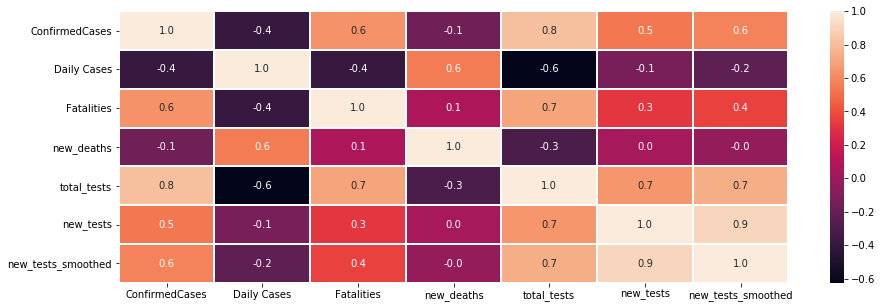

In [36]:
f,ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

#### Türkiye

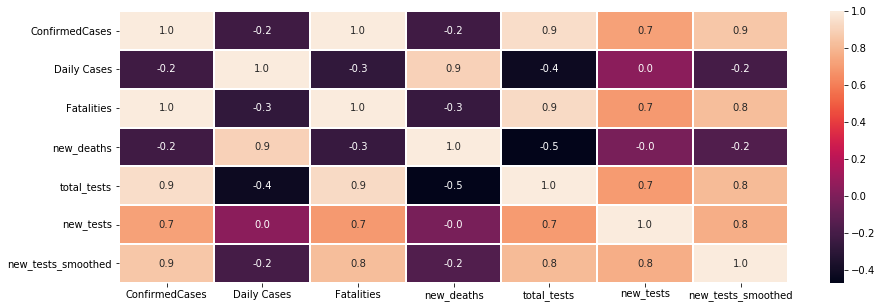

In [37]:
f,ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df[df['Country'] == 'Turkey'].corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

corr_tr = df[df['Country'] == 'Turkey'].corr()
corr_tr.style.background_gradient(cmap='coolwarm')

#### Iran

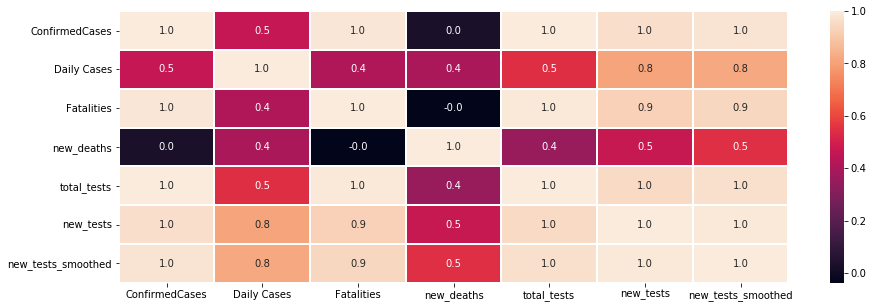

In [38]:
f,ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df[df['Country'] == 'Iran'].corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

corr_ir = df[df['Country'] == 'Iran'].corr()
corr_ir.style.background_gradient(cmap='coolwarm')

#### Italya

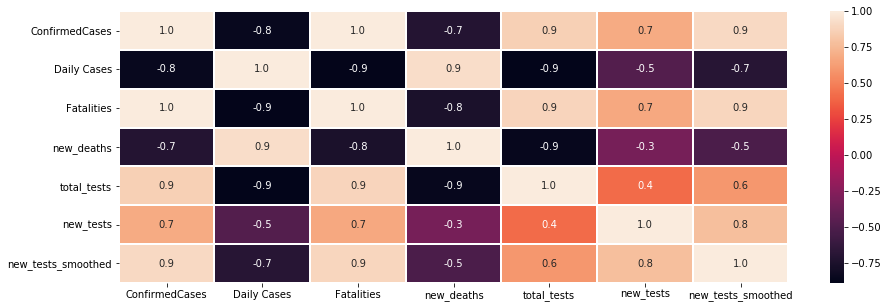

In [39]:
f,ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df[df['Country'] == 'Italy'].corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

corr_it = df[df['Country'] == 'Italy'].corr()
corr_it.style.background_gradient(cmap='coolwarm')

#### Almanya

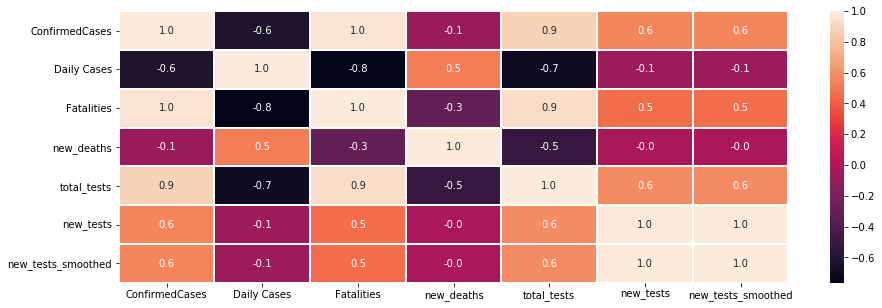

In [40]:
f,ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df[df['Country'] == 'Germany'].corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

corr_ger = df[df['Country'] == 'Germany'].corr()
corr_ger.style.background_gradient(cmap='coolwarm')

#### Fransa

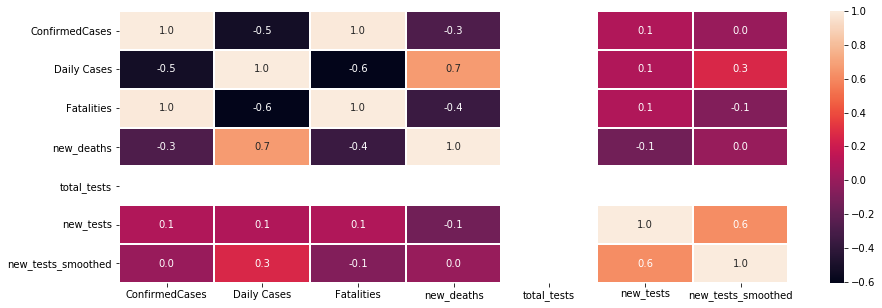

D:\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning:

invalid value encountered in less

D:\anaconda3\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning:

All-NaN slice encountered

D:\anaconda3\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning:

All-NaN slice encountered



In [41]:
f,ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df[df['Country'] == 'France'].corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

corr_fr = df[df['Country'] == 'France'].corr()
corr_fr.style.background_gradient(cmap='coolwarm')

### Ülkelerin Türkiye ile Korelasyonu

In [42]:
# Almanya
corr_tr.corrwith(corr_ger)

ConfirmedCases        0.953818
Daily Cases           0.942195
Fatalities            0.966004
new_deaths            0.960588
total_tests           0.989240
new_tests             0.934808
new_tests_smoothed    0.882926
dtype: float64

In [43]:
# İtalya
corr_tr.corrwith(corr_it)

ConfirmedCases        0.996411
Daily Cases           0.994236
Fatalities            0.996519
new_deaths            0.996262
total_tests           0.995124
new_tests             0.978050
new_tests_smoothed    0.990437
dtype: float64

In [44]:
# Fransa
corr_tr.corrwith(corr_fr)

ConfirmedCases        0.831102
Daily Cases           0.882466
Fatalities            0.845241
new_deaths            0.974839
total_tests                NaN
new_tests             0.748397
new_tests_smoothed    0.370363
dtype: float64

In [45]:
# İran
corr_tr.corrwith(corr_ir)

ConfirmedCases        0.934309
Daily Cases           0.310767
Fatalities            0.935474
new_deaths            0.649331
total_tests           0.978857
new_tests             0.862114
new_tests_smoothed    0.857364
dtype: float64